# Boston House Price Regression

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [34]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [35]:
boston = load_boston()
df_boston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
X = boston.data
y = boston.target

In [37]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [38]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [42]:
tf.keras.backend.clear_session()

In [43]:
model = Sequential()

model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))

In [44]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


epoch 수와 batchz_size 변경하며 test

In [46]:
history = model.fit(X_train, y_train, batch_size=32, epochs=500, validation_data=(X_test, y_test), verbose=1)

Train on 379 samples, validate on 127 samples
Epoch 1/500
379/379 [==============================] - 0s 475us/sample - loss: 582.0189 - mean_absolute_error: 22.2534 - mean_squared_error: 582.0188 - val_loss: 576.1613 - val_mean_absolute_error: 22.2318 - val_mean_squared_error: 576.1613
Epoch 2/500
379/379 [==============================] - 0s 58us/sample - loss: 556.9392 - mean_absolute_error: 21.6585 - mean_squared_error: 556.9392 - val_loss: 547.8526 - val_mean_absolute_error: 21.5601 - val_mean_squared_error: 547.8526
Epoch 3/500
379/379 [==============================] - 0s 74us/sample - loss: 523.1216 - mean_absolute_error: 20.8378 - mean_squared_error: 523.1216 - val_loss: 506.4888 - val_mean_absolute_error: 20.5488 - val_mean_squared_error: 506.4888
Epoch 4/500
379/379 [==============================] - 0s 63us/sample - loss: 473.0926 - mean_absolute_error: 19.5479 - mean_squared_error: 473.0926 - val_loss: 444.7184 - val_mean_absolute_error: 18.9244 - val_mean_squared_error: 44

379/379 [==============================] - 0s 74us/sample - loss: 42.4934 - mean_absolute_error: 4.6490 - mean_squared_error: 42.4934 - val_loss: 31.5779 - val_mean_absolute_error: 4.0100 - val_mean_squared_error: 31.5779
Epoch 36/500
379/379 [==============================] - 0s 58us/sample - loss: 41.4623 - mean_absolute_error: 4.5135 - mean_squared_error: 41.4623 - val_loss: 30.3946 - val_mean_absolute_error: 3.8561 - val_mean_squared_error: 30.3946
Epoch 37/500
379/379 [==============================] - 0s 55us/sample - loss: 40.4377 - mean_absolute_error: 4.4661 - mean_squared_error: 40.4377 - val_loss: 29.6126 - val_mean_absolute_error: 3.8670 - val_mean_squared_error: 29.6126
Epoch 38/500
379/379 [==============================] - 0s 63us/sample - loss: 39.4331 - mean_absolute_error: 4.3995 - mean_squared_error: 39.4331 - val_loss: 28.7767 - val_mean_absolute_error: 3.8305 - val_mean_squared_error: 28.7767
Epoch 39/500
379/379 [==============================] - 0s 55us/sample - 

Epoch 70/500
379/379 [==============================] - 0s 45us/sample - loss: 22.8803 - mean_absolute_error: 3.2799 - mean_squared_error: 22.8803 - val_loss: 15.2375 - val_mean_absolute_error: 2.9273 - val_mean_squared_error: 15.2375
Epoch 71/500
379/379 [==============================] - 0s 53us/sample - loss: 22.8101 - mean_absolute_error: 3.2013 - mean_squared_error: 22.8101 - val_loss: 14.7031 - val_mean_absolute_error: 2.8239 - val_mean_squared_error: 14.7031
Epoch 72/500
379/379 [==============================] - 0s 42us/sample - loss: 22.4924 - mean_absolute_error: 3.1948 - mean_squared_error: 22.4924 - val_loss: 14.9037 - val_mean_absolute_error: 2.8788 - val_mean_squared_error: 14.9037
Epoch 73/500
379/379 [==============================] - 0s 42us/sample - loss: 22.3515 - mean_absolute_error: 3.2131 - mean_squared_error: 22.3515 - val_loss: 14.5817 - val_mean_absolute_error: 2.8319 - val_mean_squared_error: 14.5817
Epoch 74/500
379/379 [==============================] - 0s 4

379/379 [==============================] - 0s 45us/sample - loss: 19.7871 - mean_absolute_error: 2.9898 - mean_squared_error: 19.7871 - val_loss: 13.2881 - val_mean_absolute_error: 2.7470 - val_mean_squared_error: 13.2881
Epoch 105/500
379/379 [==============================] - 0s 47us/sample - loss: 19.7723 - mean_absolute_error: 2.9291 - mean_squared_error: 19.7723 - val_loss: 13.1745 - val_mean_absolute_error: 2.7306 - val_mean_squared_error: 13.1745
Epoch 106/500
379/379 [==============================] - 0s 45us/sample - loss: 19.7846 - mean_absolute_error: 3.0358 - mean_squared_error: 19.7846 - val_loss: 13.4180 - val_mean_absolute_error: 2.7785 - val_mean_squared_error: 13.4180
Epoch 107/500
379/379 [==============================] - 0s 45us/sample - loss: 19.6674 - mean_absolute_error: 2.9280 - mean_squared_error: 19.6674 - val_loss: 13.1204 - val_mean_absolute_error: 2.7146 - val_mean_squared_error: 13.1204
Epoch 108/500
379/379 [==============================] - 0s 42us/sampl

Epoch 139/500
379/379 [==============================] - 0s 45us/sample - loss: 17.8548 - mean_absolute_error: 2.8361 - mean_squared_error: 17.8548 - val_loss: 12.2671 - val_mean_absolute_error: 2.6563 - val_mean_squared_error: 12.2671
Epoch 140/500
379/379 [==============================] - 0s 45us/sample - loss: 17.8391 - mean_absolute_error: 2.7704 - mean_squared_error: 17.8391 - val_loss: 11.8832 - val_mean_absolute_error: 2.5896 - val_mean_squared_error: 11.8832
Epoch 141/500
379/379 [==============================] - 0s 42us/sample - loss: 17.1576 - mean_absolute_error: 2.7638 - mean_squared_error: 17.1576 - val_loss: 12.1149 - val_mean_absolute_error: 2.6316 - val_mean_squared_error: 12.1149
Epoch 142/500
379/379 [==============================] - 0s 42us/sample - loss: 17.4779 - mean_absolute_error: 2.7871 - mean_squared_error: 17.4779 - val_loss: 11.8226 - val_mean_absolute_error: 2.5828 - val_mean_squared_error: 11.8226
Epoch 143/500
379/379 [==============================] -

Epoch 174/500
379/379 [==============================] - 0s 45us/sample - loss: 15.4607 - mean_absolute_error: 2.5838 - mean_squared_error: 15.4607 - val_loss: 10.6110 - val_mean_absolute_error: 2.4250 - val_mean_squared_error: 10.6110
Epoch 175/500
379/379 [==============================] - 0s 45us/sample - loss: 15.8110 - mean_absolute_error: 2.7183 - mean_squared_error: 15.8110 - val_loss: 10.5905 - val_mean_absolute_error: 2.4249 - val_mean_squared_error: 10.5905
Epoch 176/500
379/379 [==============================] - 0s 45us/sample - loss: 15.4785 - mean_absolute_error: 2.5667 - mean_squared_error: 15.4785 - val_loss: 10.6556 - val_mean_absolute_error: 2.4387 - val_mean_squared_error: 10.6556
Epoch 177/500
379/379 [==============================] - 0s 42us/sample - loss: 15.1849 - mean_absolute_error: 2.5924 - mean_squared_error: 15.1849 - val_loss: 10.6002 - val_mean_absolute_error: 2.4349 - val_mean_squared_error: 10.6002
Epoch 178/500
379/379 [==============================] -

Epoch 209/500
379/379 [==============================] - 0s 42us/sample - loss: 13.9453 - mean_absolute_error: 2.5109 - mean_squared_error: 13.9453 - val_loss: 9.7716 - val_mean_absolute_error: 2.3433 - val_mean_squared_error: 9.7716
Epoch 210/500
379/379 [==============================] - 0s 47us/sample - loss: 13.8836 - mean_absolute_error: 2.4944 - mean_squared_error: 13.8836 - val_loss: 9.7426 - val_mean_absolute_error: 2.3405 - val_mean_squared_error: 9.7426
Epoch 211/500
379/379 [==============================] - 0s 47us/sample - loss: 13.8193 - mean_absolute_error: 2.4912 - mean_squared_error: 13.8193 - val_loss: 9.6761 - val_mean_absolute_error: 2.3282 - val_mean_squared_error: 9.6761
Epoch 212/500
379/379 [==============================] - 0s 45us/sample - loss: 13.9023 - mean_absolute_error: 2.4964 - mean_squared_error: 13.9023 - val_loss: 9.6577 - val_mean_absolute_error: 2.3257 - val_mean_squared_error: 9.6577
Epoch 213/500
379/379 [==============================] - 0s 42us

Epoch 244/500
379/379 [==============================] - 0s 42us/sample - loss: 12.8336 - mean_absolute_error: 2.4219 - mean_squared_error: 12.8336 - val_loss: 9.1201 - val_mean_absolute_error: 2.2793 - val_mean_squared_error: 9.1201
Epoch 245/500
379/379 [==============================] - 0s 45us/sample - loss: 13.0862 - mean_absolute_error: 2.3960 - mean_squared_error: 13.0862 - val_loss: 9.0735 - val_mean_absolute_error: 2.2686 - val_mean_squared_error: 9.0735
Epoch 246/500
379/379 [==============================] - 0s 42us/sample - loss: 13.4356 - mean_absolute_error: 2.5698 - mean_squared_error: 13.4356 - val_loss: 9.1956 - val_mean_absolute_error: 2.2911 - val_mean_squared_error: 9.1956
Epoch 247/500
379/379 [==============================] - 0s 42us/sample - loss: 12.8416 - mean_absolute_error: 2.3667 - mean_squared_error: 12.8416 - val_loss: 8.9865 - val_mean_absolute_error: 2.2597 - val_mean_squared_error: 8.9865
Epoch 248/500
379/379 [==============================] - 0s 42us

379/379 [==============================] - 0s 45us/sample - loss: 11.9075 - mean_absolute_error: 2.3390 - mean_squared_error: 11.9075 - val_loss: 8.7410 - val_mean_absolute_error: 2.2227 - val_mean_squared_error: 8.7410
Epoch 280/500
379/379 [==============================] - 0s 42us/sample - loss: 11.7644 - mean_absolute_error: 2.2998 - mean_squared_error: 11.7644 - val_loss: 8.6183 - val_mean_absolute_error: 2.2091 - val_mean_squared_error: 8.6183
Epoch 281/500
379/379 [==============================] - 0s 42us/sample - loss: 11.7860 - mean_absolute_error: 2.3127 - mean_squared_error: 11.7860 - val_loss: 8.6263 - val_mean_absolute_error: 2.2102 - val_mean_squared_error: 8.6263
Epoch 282/500
379/379 [==============================] - 0s 40us/sample - loss: 11.6769 - mean_absolute_error: 2.2977 - mean_squared_error: 11.6769 - val_loss: 8.6128 - val_mean_absolute_error: 2.2104 - val_mean_squared_error: 8.6128
Epoch 283/500
379/379 [==============================] - 0s 42us/sample - loss

379/379 [==============================] - 0s 45us/sample - loss: 10.9652 - mean_absolute_error: 2.2354 - mean_squared_error: 10.9652 - val_loss: 8.4117 - val_mean_absolute_error: 2.1532 - val_mean_squared_error: 8.4117
Epoch 315/500
379/379 [==============================] - 0s 42us/sample - loss: 10.8288 - mean_absolute_error: 2.2359 - mean_squared_error: 10.8288 - val_loss: 8.2825 - val_mean_absolute_error: 2.1531 - val_mean_squared_error: 8.2825
Epoch 316/500
379/379 [==============================] - 0s 42us/sample - loss: 11.1038 - mean_absolute_error: 2.2627 - mean_squared_error: 11.1038 - val_loss: 8.6334 - val_mean_absolute_error: 2.1810 - val_mean_squared_error: 8.6334
Epoch 317/500
379/379 [==============================] - 0s 42us/sample - loss: 10.9748 - mean_absolute_error: 2.2275 - mean_squared_error: 10.9748 - val_loss: 8.2878 - val_mean_absolute_error: 2.1496 - val_mean_squared_error: 8.2878
Epoch 318/500
379/379 [==============================] - 0s 40us/sample - loss

379/379 [==============================] - 0s 40us/sample - loss: 10.1529 - mean_absolute_error: 2.1590 - mean_squared_error: 10.1529 - val_loss: 8.0331 - val_mean_absolute_error: 2.0921 - val_mean_squared_error: 8.0331
Epoch 350/500
379/379 [==============================] - 0s 40us/sample - loss: 10.1880 - mean_absolute_error: 2.1820 - mean_squared_error: 10.1880 - val_loss: 8.1924 - val_mean_absolute_error: 2.1091 - val_mean_squared_error: 8.1924
Epoch 351/500
379/379 [==============================] - 0s 37us/sample - loss: 10.3371 - mean_absolute_error: 2.1668 - mean_squared_error: 10.3371 - val_loss: 7.9357 - val_mean_absolute_error: 2.0869 - val_mean_squared_error: 7.9357
Epoch 352/500
379/379 [==============================] - 0s 40us/sample - loss: 10.5704 - mean_absolute_error: 2.2795 - mean_squared_error: 10.5704 - val_loss: 8.6555 - val_mean_absolute_error: 2.1785 - val_mean_squared_error: 8.6555
Epoch 353/500
379/379 [==============================] - 0s 37us/sample - loss

379/379 [==============================] - 0s 42us/sample - loss: 9.5768 - mean_absolute_error: 2.1242 - mean_squared_error: 9.5768 - val_loss: 7.8188 - val_mean_absolute_error: 2.0601 - val_mean_squared_error: 7.8188
Epoch 385/500
379/379 [==============================] - 0s 42us/sample - loss: 9.8082 - mean_absolute_error: 2.1555 - mean_squared_error: 9.8082 - val_loss: 7.9048 - val_mean_absolute_error: 2.0612 - val_mean_squared_error: 7.9048
Epoch 386/500
379/379 [==============================] - 0s 45us/sample - loss: 9.5579 - mean_absolute_error: 2.1119 - mean_squared_error: 9.5579 - val_loss: 7.7218 - val_mean_absolute_error: 2.0473 - val_mean_squared_error: 7.7218
Epoch 387/500
379/379 [==============================] - 0s 47us/sample - loss: 9.5196 - mean_absolute_error: 2.1106 - mean_squared_error: 9.5196 - val_loss: 7.8238 - val_mean_absolute_error: 2.0529 - val_mean_squared_error: 7.8238
Epoch 388/500
379/379 [==============================] - 0s 42us/sample - loss: 9.6117

379/379 [==============================] - 0s 45us/sample - loss: 9.0119 - mean_absolute_error: 2.0613 - mean_squared_error: 9.0119 - val_loss: 7.4804 - val_mean_absolute_error: 1.9983 - val_mean_squared_error: 7.4805
Epoch 420/500
379/379 [==============================] - 0s 42us/sample - loss: 9.0575 - mean_absolute_error: 2.0746 - mean_squared_error: 9.0575 - val_loss: 7.4884 - val_mean_absolute_error: 2.0012 - val_mean_squared_error: 7.4884
Epoch 421/500
379/379 [==============================] - 0s 45us/sample - loss: 9.0754 - mean_absolute_error: 2.0711 - mean_squared_error: 9.0754 - val_loss: 7.6540 - val_mean_absolute_error: 2.0263 - val_mean_squared_error: 7.6540
Epoch 422/500
379/379 [==============================] - 0s 42us/sample - loss: 8.9833 - mean_absolute_error: 2.0615 - mean_squared_error: 8.9833 - val_loss: 7.4842 - val_mean_absolute_error: 1.9993 - val_mean_squared_error: 7.4842
Epoch 423/500
379/379 [==============================] - 0s 40us/sample - loss: 8.9698

379/379 [==============================] - 0s 47us/sample - loss: 8.6205 - mean_absolute_error: 2.0496 - mean_squared_error: 8.6205 - val_loss: 7.4169 - val_mean_absolute_error: 1.9695 - val_mean_squared_error: 7.4169
Epoch 455/500
379/379 [==============================] - 0s 50us/sample - loss: 8.9802 - mean_absolute_error: 2.0856 - mean_squared_error: 8.9802 - val_loss: 7.4420 - val_mean_absolute_error: 1.9947 - val_mean_squared_error: 7.4420
Epoch 456/500
379/379 [==============================] - 0s 53us/sample - loss: 8.5999 - mean_absolute_error: 2.0486 - mean_squared_error: 8.5999 - val_loss: 7.3943 - val_mean_absolute_error: 1.9725 - val_mean_squared_error: 7.3943
Epoch 457/500
379/379 [==============================] - 0s 50us/sample - loss: 8.4698 - mean_absolute_error: 2.0294 - mean_squared_error: 8.4698 - val_loss: 7.2604 - val_mean_absolute_error: 1.9447 - val_mean_squared_error: 7.2604
Epoch 458/500
379/379 [==============================] - 0s 50us/sample - loss: 8.5224

379/379 [==============================] - 0s 61us/sample - loss: 8.0844 - mean_absolute_error: 1.9795 - mean_squared_error: 8.0844 - val_loss: 7.0760 - val_mean_absolute_error: 1.9027 - val_mean_squared_error: 7.0760
Epoch 490/500
379/379 [==============================] - 0s 50us/sample - loss: 8.0745 - mean_absolute_error: 1.9844 - mean_squared_error: 8.0745 - val_loss: 7.0625 - val_mean_absolute_error: 1.9084 - val_mean_squared_error: 7.0625
Epoch 491/500
379/379 [==============================] - 0s 53us/sample - loss: 8.0885 - mean_absolute_error: 1.9775 - mean_squared_error: 8.0885 - val_loss: 7.1247 - val_mean_absolute_error: 1.9090 - val_mean_squared_error: 7.1247
Epoch 492/500
379/379 [==============================] - 0s 58us/sample - loss: 8.1351 - mean_absolute_error: 1.9993 - mean_squared_error: 8.1351 - val_loss: 7.0989 - val_mean_absolute_error: 1.9120 - val_mean_squared_error: 7.0989
Epoch 493/500
379/379 [==============================] - 0s 42us/sample - loss: 8.2509

In [47]:
model.evaluate(X_test, y_test)

127/127 [==============================] - 0s 31us/sample - loss: 6.9209 - mean_absolute_error: 1.8903 - mean_squared_error: 6.9209


[6.920871062541571, 1.8903373, 6.9208713]

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

6.920870647268152
0.9138449132731801


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

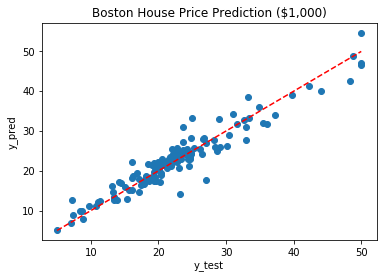

In [50]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

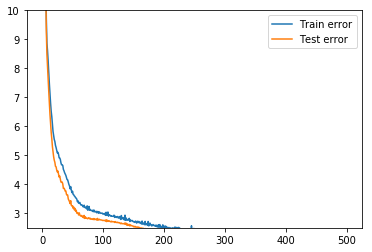

In [51]:
plt.plot(history.history['mean_absolute_error'], label='Train error')
plt.plot(history.history['val_mean_absolute_error'], label='Test error')
plt.ylim([2.5, 10])
plt.legend()

## sklearn OLS 와 비교

In [52]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [53]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
y_pred = regr.predict(X_test)

In [55]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -4.8170333    5.61229644   2.07552376   3.13571088 -10.35179206
  14.56826162   2.33838711 -14.01563857   6.96424641  -6.77978699
  -8.64381821   3.79453682 -22.70650212]
Intercept: 
 28.536143231596817


In [56]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("Variance score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 22.98
Variance score: 0.75


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

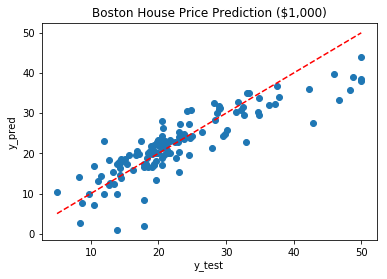

In [57]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [58]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [59]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산